In [1]:
import pandas as pd
import os, sys

In [2]:
working_dir = os.getcwd()
parrent_dir = os.path.dirname(working_dir)
sys.path.insert(0,parrent_dir)

In [3]:
os.path.join(os.path.dirname(working_dir), 'scripts')

'c:\\Users\\Abreham\\Documents\\Ml_projects\\Bati-bank-credit-scoring\\scripts'

In [4]:
# notebook_dir = os.getcwd()  # Get the directory of the current notebook
# script_dir = os.path.join(notebook_dir) 
# script_dir

In [4]:
file_path = os.path.join('../datasets/', 'data.xlsx')

In [5]:
from scripts.eda_Pipeline import EDAPipeline

In [6]:
from scripts.woE_binning import CreditScoringPipeline
from scripts.model_training import ModelTrainingPipeline

In [7]:
pipeline = EDAPipeline()
df = pipeline.load_data(file_path)

2025-01-28 16:45:25,037 - INFO - Loading data from: ../datasets/data.xlsx
2025-01-28 16:45:41,595 - INFO - Data loaded successfully with shape: (95662, 16)


In [8]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256.0,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2018-11-15T02:18:49Z,2.0,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_2,3679.0,20.0,2018-11-15T02:19:08Z,2.0,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256.0,NaN,ProductId_1,airtime,ChannelId_3,500.0,500.0,2018-11-15T02:44:21Z,2.0,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256.0,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,NaN,2018-11-15T03:32:55Z,2.0,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2018-11-15T03:34:21Z,2.0,0


In [9]:
pipeline.identify_missing_values(df)

2025-01-27 22:48:33,124 - INFO - Identifying missing values
2025-01-27 22:48:33,124 - INFO - Missing Values:
TransactionId           0
BatchId                 0
AccountId               2
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             2
ProviderId              2
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   3
TransactionStartTime    1
PricingStrategy         3
FraudResult             0
dtype: int64
2025-01-27 22:48:33,124 - INFO - Percentage of Missing Values:
TransactionId           0.000000
BatchId                 0.000000
AccountId               0.002091
SubscriptionId          0.000000
CustomerId              0.000000
CurrencyCode            0.000000
CountryCode             0.002091
ProviderId              0.002091
ProductId               0.000000
ProductCategory         0.000000
ChannelId               0.000000
Amount                  0.000000
Val

In [10]:
pipeline.summarize_data(df)

2025-01-27 22:48:33,229 - INFO - Performing summary statistics
2025-01-27 22:48:33,229 - INFO - Number of rows: 95662
2025-01-27 22:48:33,229 - INFO - Number of columns: 16
2025-01-27 22:48:33,229 - INFO - Data types: 
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode             float64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                   float64
TransactionStartTime     object
PricingStrategy         float64
FraudResult               int64
dtype: object
2025-01-27 22:48:33,233 - INFO - First 5 rows of the DataFrame:
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_

2025-01-27 14:32:46,157 - INFO - Performing correlation analysis


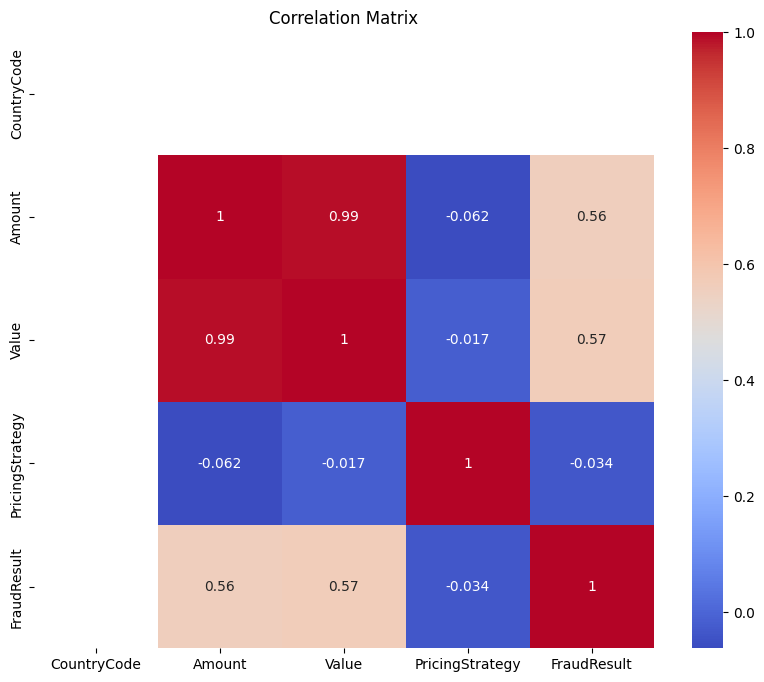

In [11]:
pipeline.analyze_correlation(df)

2025-01-27 14:32:47,953 - INFO - Visualizing categorical feature distributions


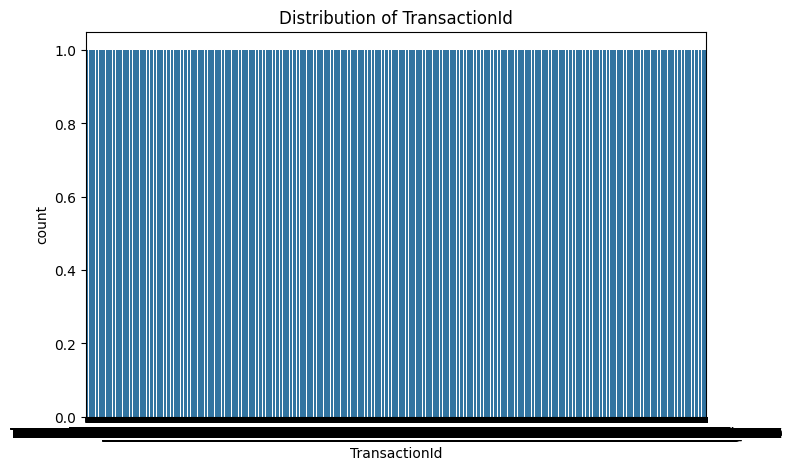

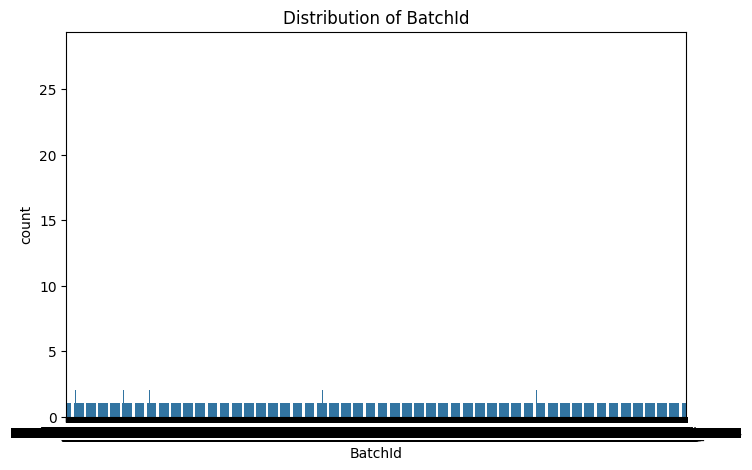

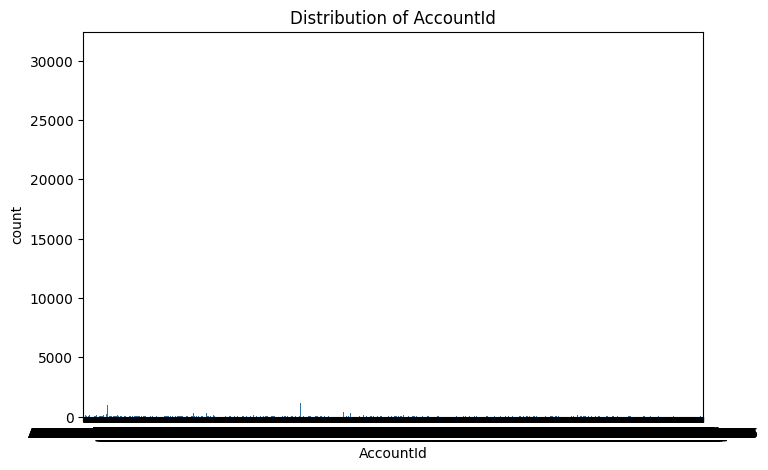

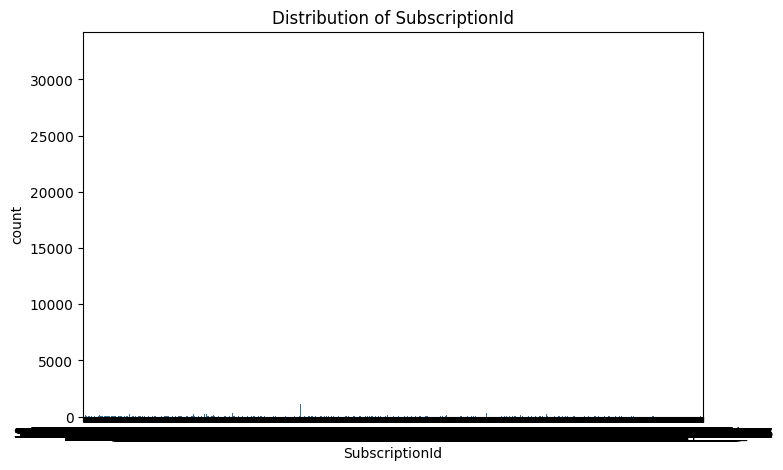

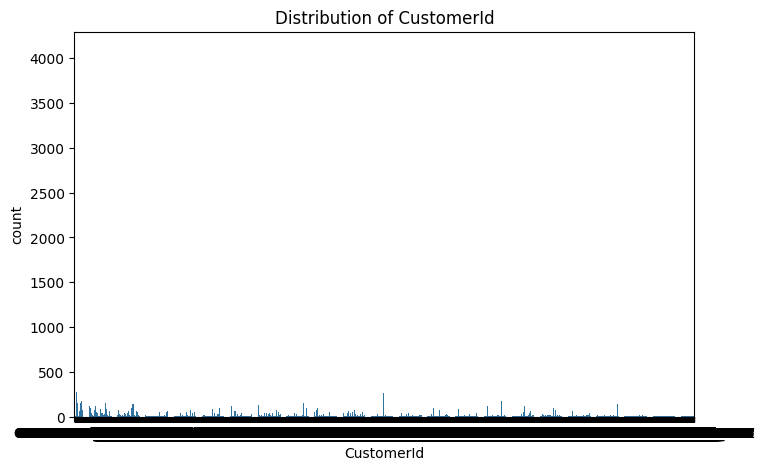

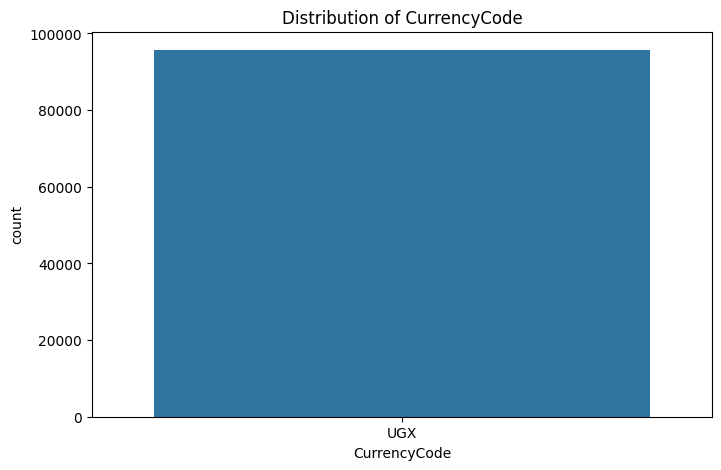

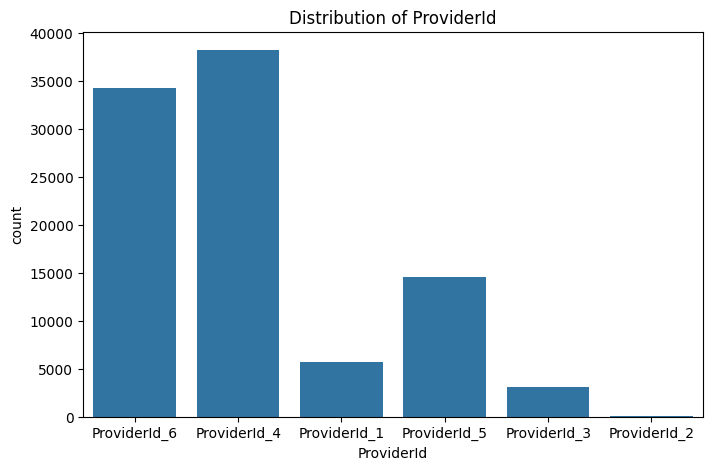

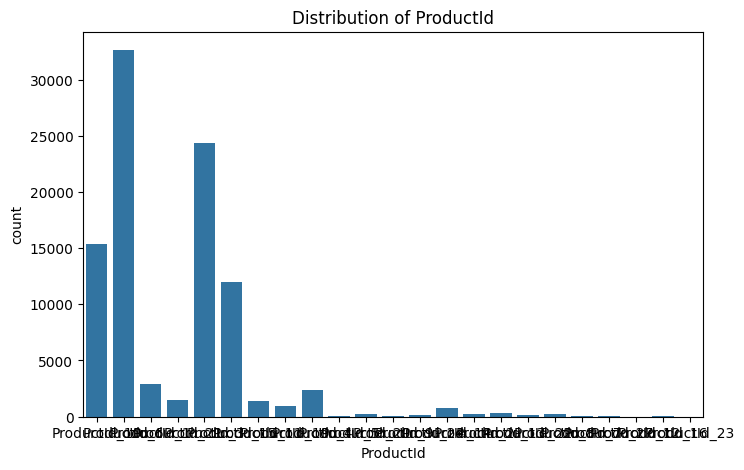

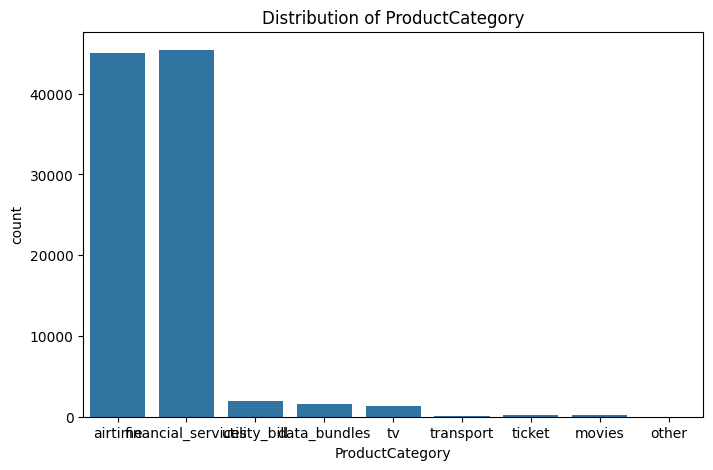

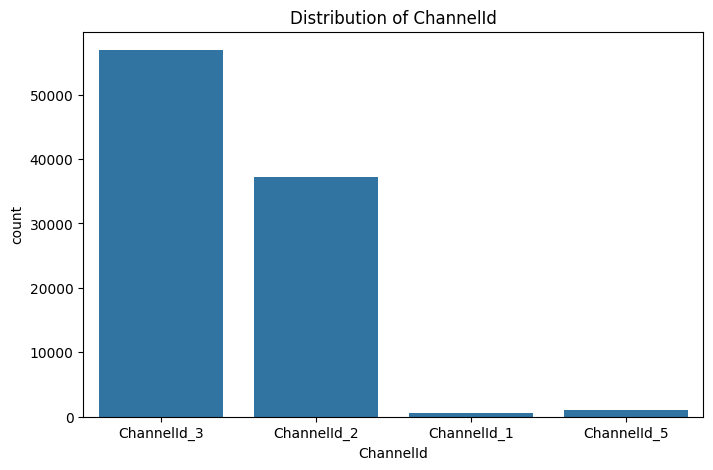

2025-01-27 14:58:28,654 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-27 14:58:34,120 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


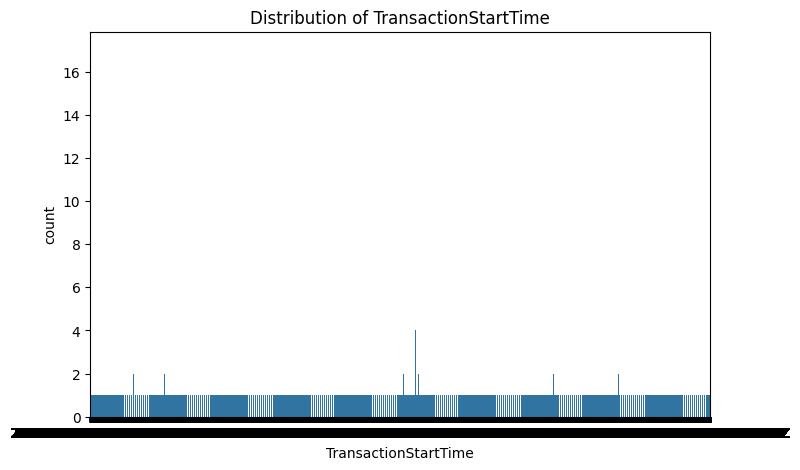

In [12]:
pipeline.visualize_categorical_features(df)

2025-01-27 15:12:14,445 - INFO - Visualizing numerical feature distributions


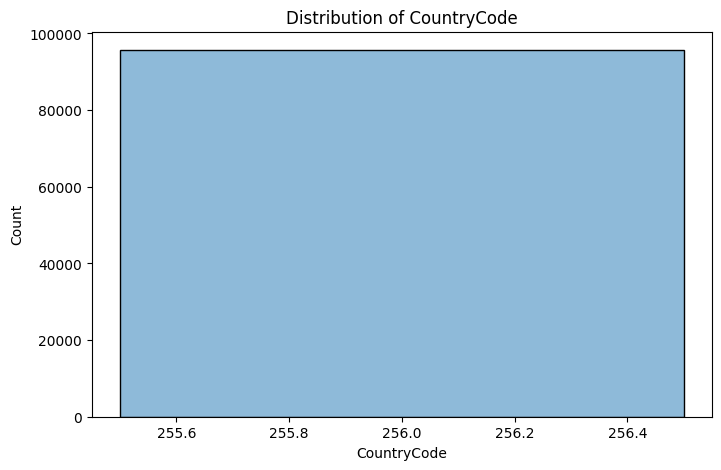

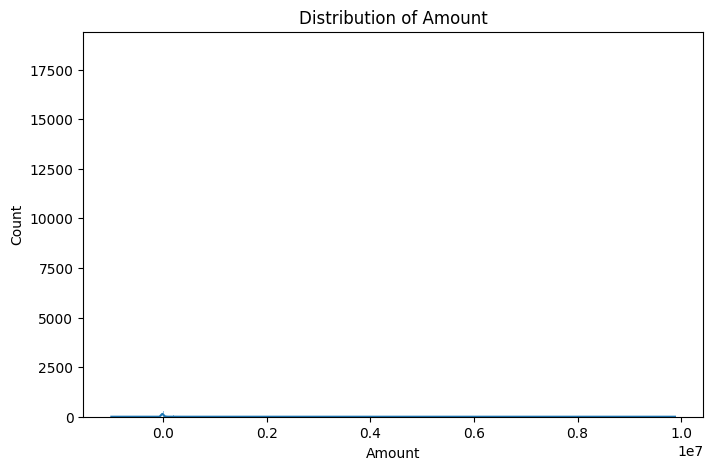

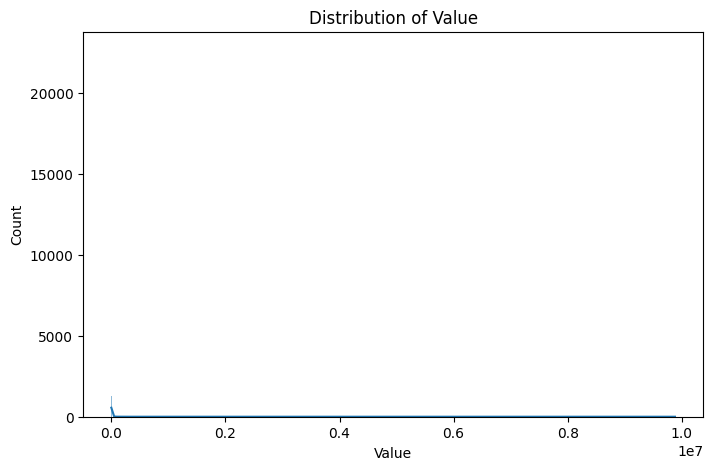

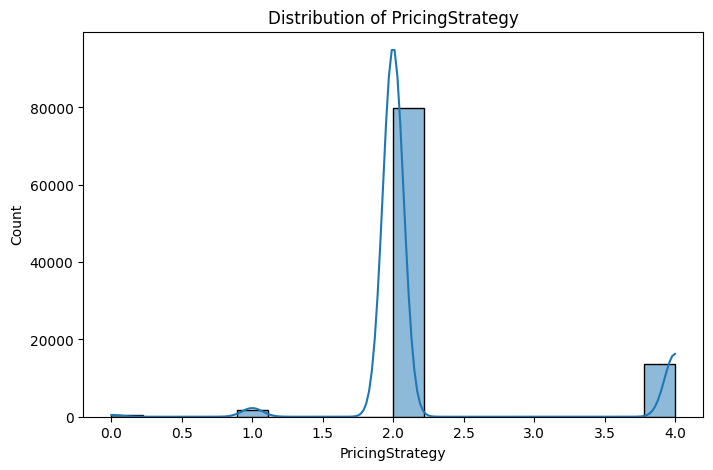

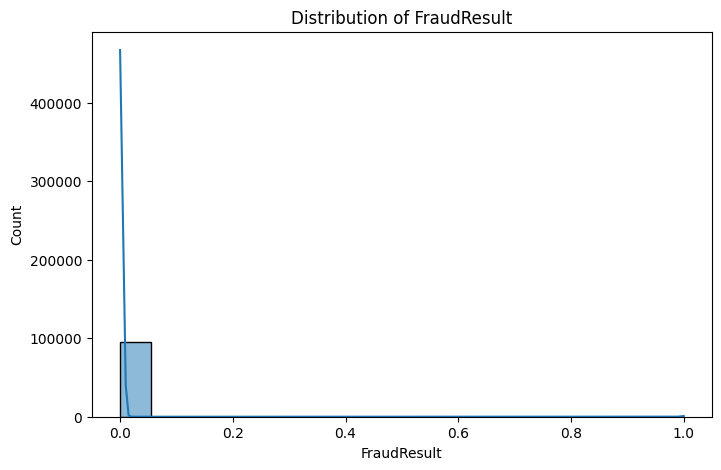

In [13]:
pipeline.visualize_numerical_features(df)

In [9]:
features = CreditScoringPipeline(df)

In [10]:
features.feature_engineering_steps()

2025-01-28 16:45:44,166 - INFO -            CustomerId  total_transaction_amount  average_transaction_amount  \
0        CustomerId_1                  -10000.0               -10000.000000   
1       CustomerId_10                  -10000.0               -10000.000000   
2     CustomerId_1001                   20000.0                 4000.000000   
3     CustomerId_1002                    4225.0                  384.090909   
4     CustomerId_1003                   20000.0                 3333.333333   
...               ...                       ...                         ...   
3737   CustomerId_992                   20000.0                 3333.333333   
3738   CustomerId_993                   20000.0                 4000.000000   
3739   CustomerId_994                  543873.0                 5384.881188   
3740   CustomerId_996                  139000.0                 8176.470588   
3741   CustomerId_998                  100000.0                 4545.454545   

      transaction_

In [11]:
df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,transaction_hour,transaction_day,transaction_month,transaction_year
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256.0,ProviderId_6,ProductId_10,0,ChannelId_3,0.092004,1000.0,2018-11-15 02:18:49+00:00,2.0,0,2.0,15.0,11.0,2018.0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,NaN,ProviderId_4,ProductId_6,2,ChannelId_2,0.092250,20.0,2018-11-15 02:19:08+00:00,2.0,0,2.0,15.0,11.0,2018.0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256.0,NaN,ProductId_1,0,ChannelId_3,0.091958,500.0,2018-11-15 02:44:21+00:00,2.0,0,2.0,15.0,11.0,2018.0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256.0,ProviderId_1,ProductId_21,8,ChannelId_3,0.093750,NaN,2018-11-15 03:32:55+00:00,2.0,0,3.0,15.0,11.0,2018.0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,NaN,ProviderId_4,ProductId_6,2,ChannelId_2,0.091853,644.0,2018-11-15 03:34:21+00:00,2.0,0,3.0,15.0,11.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256.0,ProviderId_4,ProductId_6,2,ChannelId_2,0.091820,1000.0,2019-02-13 09:54:09+00:00,2.0,0,9.0,13.0,2.0,2019.0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256.0,ProviderId_6,ProductId_10,0,ChannelId_3,0.092004,1000.0,2019-02-13 09:54:25+00:00,2.0,0,9.0,13.0,2.0,2019.0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256.0,ProviderId_4,ProductId_6,2,ChannelId_2,0.091910,20.0,2019-02-13 09:54:35+00:00,2.0,0,9.0,13.0,2.0,2019.0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256.0,ProviderId_6,ProductId_19,7,ChannelId_3,0.092188,3000.0,2019-02-13 10:01:10+00:00,2.0,0,10.0,13.0,2.0,2019.0


In [12]:
features.rfms_and_woe_binning_steps()

2025-01-28 16:45:50,291 - INFO - Labeling Data
2025-01-28 16:45:50,291 - INFO -               TransactionId         BatchId       AccountId  \
0       TransactionId_76871   BatchId_36123  AccountId_3957   
1       TransactionId_73770   BatchId_15642  AccountId_4841   
2       TransactionId_26203   BatchId_53941  AccountId_4229   
3         TransactionId_380  BatchId_102363   AccountId_648   
4       TransactionId_28195   BatchId_38780  AccountId_4841   
...                     ...             ...             ...   
95657   TransactionId_89881   BatchId_96668  AccountId_4841   
95658   TransactionId_91597    BatchId_3503  AccountId_3439   
95659   TransactionId_82501  BatchId_118602  AccountId_4841   
95660  TransactionId_136354   BatchId_70924  AccountId_1346   
95661   TransactionId_35670   BatchId_29317  AccountId_4841   

            SubscriptionId       CustomerId CurrencyCode  CountryCode  \
0       SubscriptionId_887  CustomerId_4406          UGX        256.0   
1      Subscripti

AttributeError: module 'pandas.core.algorithms' has no attribute 'quantile'

In [13]:
pipeline.identify_missing_values(df)

2025-01-28 16:46:18,541 - INFO - Identifying missing values
2025-01-28 16:46:18,543 - INFO - Missing Values:
TransactionId           0
BatchId                 0
AccountId               2
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             2
ProviderId              2
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   3
TransactionStartTime    1
PricingStrategy         3
FraudResult             0
transaction_hour        1
transaction_day         1
transaction_month       1
transaction_year        1
Recency                 1
Frequency               0
Monetary                0
Subscription            0
RiskLabel               0
dtype: int64
2025-01-28 16:46:18,544 - INFO - Percentage of Missing Values:
TransactionId           0.000000
BatchId                 0.000000
AccountId               0.002091
SubscriptionId          0.000000
CustomerId              0.000000


In [14]:
df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,FraudResult,transaction_hour,transaction_day,transaction_month,transaction_year,Recency,Frequency,Monetary,Subscription,RiskLabel
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256.0,ProviderId_6,ProductId_10,0,...,0,2.0,15.0,11.0,2018.0,2266.0,119,10.947943,3,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,NaN,ProviderId_4,ProductId_6,2,...,0,2.0,15.0,11.0,2018.0,2266.0,119,10.947943,3,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256.0,NaN,ProductId_1,0,...,0,2.0,15.0,11.0,2018.0,2266.0,2,0.183915,1,1
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256.0,ProviderId_1,ProductId_21,8,...,0,3.0,15.0,11.0,2018.0,2266.0,38,3.513670,5,1
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,NaN,ProviderId_4,ProductId_6,2,...,0,3.0,15.0,11.0,2018.0,2266.0,38,3.513670,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256.0,ProviderId_4,ProductId_6,2,...,0,9.0,13.0,2.0,2019.0,2176.0,573,52.889535,3,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256.0,ProviderId_6,ProductId_10,0,...,0,9.0,13.0,2.0,2019.0,2176.0,43,3.957583,3,1
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256.0,ProviderId_4,ProductId_6,2,...,0,9.0,13.0,2.0,2019.0,2176.0,43,3.957583,3,1
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256.0,ProviderId_6,ProductId_19,7,...,0,10.0,13.0,2.0,2019.0,2176.0,524,48.240072,4,0


##### Model Trainiing

In [15]:
df_train = df.copy()

In [16]:
df_train = df_train.dropna()

In [17]:
df_train

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,FraudResult,transaction_hour,transaction_day,transaction_month,transaction_year,Recency,Frequency,Monetary,Subscription,RiskLabel
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256.0,ProviderId_6,ProductId_10,0,...,0,2.0,15.0,11.0,2018.0,2266.0,119,10.947943,3,0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256.0,ProviderId_5,ProductId_3,0,...,0,3.0,15.0,11.0,2018.0,2266.0,29,2.674026,2,1
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256.0,ProviderId_6,ProductId_10,0,...,0,4.0,15.0,11.0,2018.0,2266.0,4,0.368680,2,1
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256.0,ProviderId_1,ProductId_15,2,...,0,4.0,15.0,11.0,2018.0,2266.0,7,0.644650,2,1
10,TransactionId_51800,BatchId_112288,AccountId_2634,SubscriptionId_3511,CustomerId_3052,UGX,256.0,ProviderId_6,ProductId_3,0,...,0,4.0,15.0,11.0,2018.0,2266.0,12,1.104240,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256.0,ProviderId_4,ProductId_6,2,...,0,9.0,13.0,2.0,2019.0,2176.0,573,52.889535,3,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256.0,ProviderId_6,ProductId_10,0,...,0,9.0,13.0,2.0,2019.0,2176.0,43,3.957583,3,1
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256.0,ProviderId_4,ProductId_6,2,...,0,9.0,13.0,2.0,2019.0,2176.0,43,3.957583,3,1
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256.0,ProviderId_6,ProductId_19,7,...,0,10.0,13.0,2.0,2019.0,2176.0,524,48.240072,4,0


In [29]:
pipeline.identify_missing_values(df_train)

2025-01-28 16:40:13,125 - INFO - Identifying missing values
2025-01-28 16:40:13,127 - INFO - Missing Values:
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
transaction_hour        0
transaction_day         0
transaction_month       0
transaction_year        0
Recency                 0
Frequency               0
Monetary                0
Subscription            0
RiskLabel               0
dtype: int64
2025-01-28 16:40:13,128 - INFO - Percentage of Missing Values:
TransactionId           0.0
BatchId                 0.0
AccountId               0.0
SubscriptionId          0.0
CustomerId              0.0
CurrencyCode            0

In [18]:
from scripts.model_training import ModelTrainingPipeline

In [19]:
modeling = ModelTrainingPipeline(df_train)


In [20]:
modeling.split_data()

In [21]:
modeling.train_models()

ValueError: could not convert string to float: 'BatchId_130269'

In [ ]:

modeling.tune_hyperparameters()

In [ ]:

results_df, best_model, best_params = modeling.get_results()

In [26]:
df_train.columns

Index(['TransactionId', 'BatchId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount',
       'FraudResult', 'Frequency', 'Monetary', 'Subscription', 'RiskLabel'],
      dtype='object')